In [1]:
import os
from scripts import check_claim_structure as cs
from scripts import table
from scripts import utils
from scripts import eval

In [2]:
def process_datasets(tables_path, requests_path):
    dataset_results = {}

    # Iterate through all directories in dataset_path
    for directory in os.listdir(requests_path):
        if os.path.isdir(os.path.join(requests_path, directory)):
            model_answers_path = os.path.join(requests_path, directory, 'answers')
            extracted_claims_path = os.path.join(requests_path, directory, 'claims.json')

            extracted_claims = cs.extract_answers(model_answers_path, extracted_claims_path)
            extracted_tables = table.load_tables_from_json(tables_path)

            results = eval.evaluate_extracted_articles(extracted_claims, extracted_tables)
            results = list(results.items())
            results.sort()

            dataset_results[directory] = results

    return dataset_results

tables_file_path = 'experiments/extracted_tables/cs_tables.json'
dataset_path = 'experiments/output/cs_main'

d_results = process_datasets(tables_file_path, dataset_path)

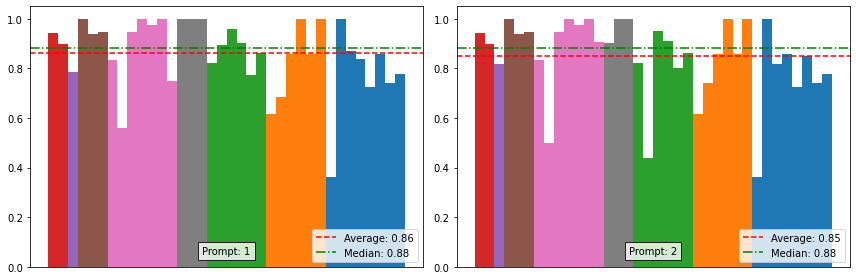

In [3]:
utils.plot_dataset_results(d_results, 2)

In [4]:
answers_path = 'experiments/output/cs_main/1/answers'
output_path = 'experiments/output/cs_main/1/claims.json'
tables_file_path = 'experiments/extracted_tables/cs_tables.json'

claims = cs.extract_answers(answers_path, output_path)
tables = table.load_tables_from_json(tables_file_path)

In [5]:
article_id = '2304.12329'
table_idx = 3

html_table = tables[article_id][table_idx]['table']
table_values, table_pd = cs.get_table_values(html_table)

claim_values = claims[article_id][table_idx]['extracted_claims']
claim_specs, claim_results, all_values_extracted = cs.count_specifications(claim_values)

unique_table_vales = utils.remove_duplicates(table_values)
unique_values_extracted = utils.remove_duplicates(all_values_extracted)

similarities, similarity_scores = eval.find_similar_strings(unique_table_vales, unique_values_extracted)

# table_pd[0].head()
# utils.print_claims(claims)

eval.evaluate(similarities, table_values, all_values_extracted)

1.0

In [6]:
table_pd[0].head()

,Unnamed: 0_level_0,WC,FT,GE,BT,AT,RA,DT,XT,ST,S5,SA,SM
,Init,32.4,159.7,5.87,4.72,3.99,5.28,4.3,4.73,9.19,9.84,9.33,8.36
0,D1,0.0,0.2,1.9,2.6,2.4,2.3,1.3,4.0,1.1,1.1,0.7,0.5
1,D2,0.1,1.6,0.2,3.1,2.4,2.3,2.2,3.3,3.4,3.4,1.8,0.9
2,D3,0.9,9.6,0.4,10.1,6.7,6.3,8.6,8.3,10.3,12.4,5.8,2.3
3,D4,0.2,2.5,0.3,5.9,5.2,5.3,4.2,7.8,5.1,5.4,2.8,1.4
4,D5,0.4,3.8,0.4,13.6,13.0,12.9,8.7,20.3,10.7,12.1,6.0,3.2


In [7]:
similarities

{'9.7': ['9.7'],
 '3.3': ['3.3'],
 '3.4': ['3.4'],
 '3.2': ['3.2'],
 'D6': ['D6'],
 '19.5': ['19.5'],
 '2.4': ['2.4'],
 '13.0': ['13.0'],
 '13.8': ['13.8'],
 '8.7': ['8.7'],
 'D4': ['D4'],
 'D5': ['D5'],
 '24.2': ['24.2'],
 '2.6': ['2.6'],
 'D3': ['D3'],
 '66.0': ['66.0'],
 '12.4': ['12.4'],
 '30.2': ['30.2'],
 '4.2': ['4.2'],
 '0.2': ['0.2'],
 '27.3': ['27.3'],
 '1.1': ['1.1'],
 '1.2': ['1.2'],
 '9.6': ['9.6'],
 '10.1': ['10.1'],
 '14.3': ['14.3'],
 '4.0': ['4.0'],
 'D2': ['D2'],
 '99.9': ['99.9'],
 '13.6': ['13.6'],
 '65.5': ['65.5'],
 '1.9': ['1.9'],
 '3.6': ['3.6'],
 '11.9': ['11.9'],
 '10.3': ['10.3'],
 '3.8': ['3.8'],
 '10.0': ['10.0'],
 '61.5': ['61.5'],
 '5.4': ['5.4'],
 '2.2': ['2.2'],
 '7.8': ['7.8'],
 '38.9': ['38.9'],
 '28.9': ['28.9'],
 '1.0': ['1.0'],
 '14.9': ['14.9'],
 '73.4': ['73.4'],
 '10.7': ['10.7'],
 'D10': ['D10'],
 'D1': ['D1'],
 '0.9': ['0.9'],
 '8.0': ['8.0'],
 '16.5': ['16.5'],
 '6.3': ['6.3'],
 '2.8': ['2.8'],
 '8.6': ['8.6'],
 '20.3': ['20.3'],
 'D7': ['D7'